Predicting Salaries with Decision Trees
=======================================


### Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import tree

In [2]:
attribute_names = (
    'age',
    'workclass',
    'fnlwgt',
    'education',
    'education-num',
    'marital-status',
    'occupation',
    'relationship',
    'race',
    'sex',
    'capital-gain',
    'capital-loss',
    'hours-per-week',
    'native-country',
    'salary-class',
)

In [3]:
df = pd.read_csv("./adult.data", names=attribute_names, sep=",")

### Data Preprocessing

In [4]:
excludes = (
    'fnlwgt', 
    'education-num',
    'capital-gain', 
    'capital-loss'
)

for atr in excludes:
    del df[atr]

In [5]:
booleans = (
    'sex', 
    'native-country', 
    'salary-class'
)

for atr in booleans:
    df[atr] = df[atr].astype('category')
    df[atr] = df[atr].cat.codes

In [6]:
categoricals = (
    'workclass', 
    'education', 
    'marital-status', 
    'occupation', 
    'relationship', 
    'race'
)

for atr in categoricals:
    df = pd.concat([df, pd.get_dummies(df[atr], prefix=atr)])
    del df[atr]


In [12]:
df.fillna(0, inplace=True)

### Training the Model

In [13]:
y = df["salary-class"]

In [14]:
X = df.copy()
X = X.drop(columns="salary-class")

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [16]:
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [18]:
y_test_pred = clf.predict(X_test)

In [17]:
y_train_pred = clf.predict(X_train)

### Assess Model

In [19]:
train_acc = accuracy_score(y_train,y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print(f"Train Accuracy:", train_acc)
print(f"Test Accuracy:", test_acc)

Train Accuracy: 0.9972067339199192
Test Accuracy: 0.9961014353872172


### Pruning Decision Tree

In [21]:
sizes = [2,3,5,10,20,50,100,250,500,750,1000,2500,5000,10000,15000]
train_accs = []
test_accs = []

for s in sizes:
    clf = DecisionTreeClassifier(criterion="entropy", min_samples_split=s)
    clf.fit(X_train, y_train)
    
    train_accs.append(accuracy_score(y_train,clf.predict(X_train)))
    test_accs.append(accuracy_score(y_test,clf.predict(X_test)))

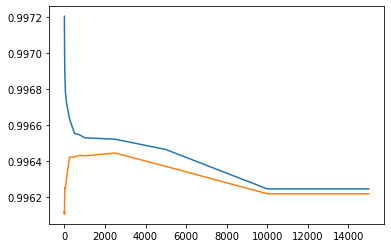

In [24]:
plt.plot(sizes, train_accs);
plt.plot(sizes, test_accs);

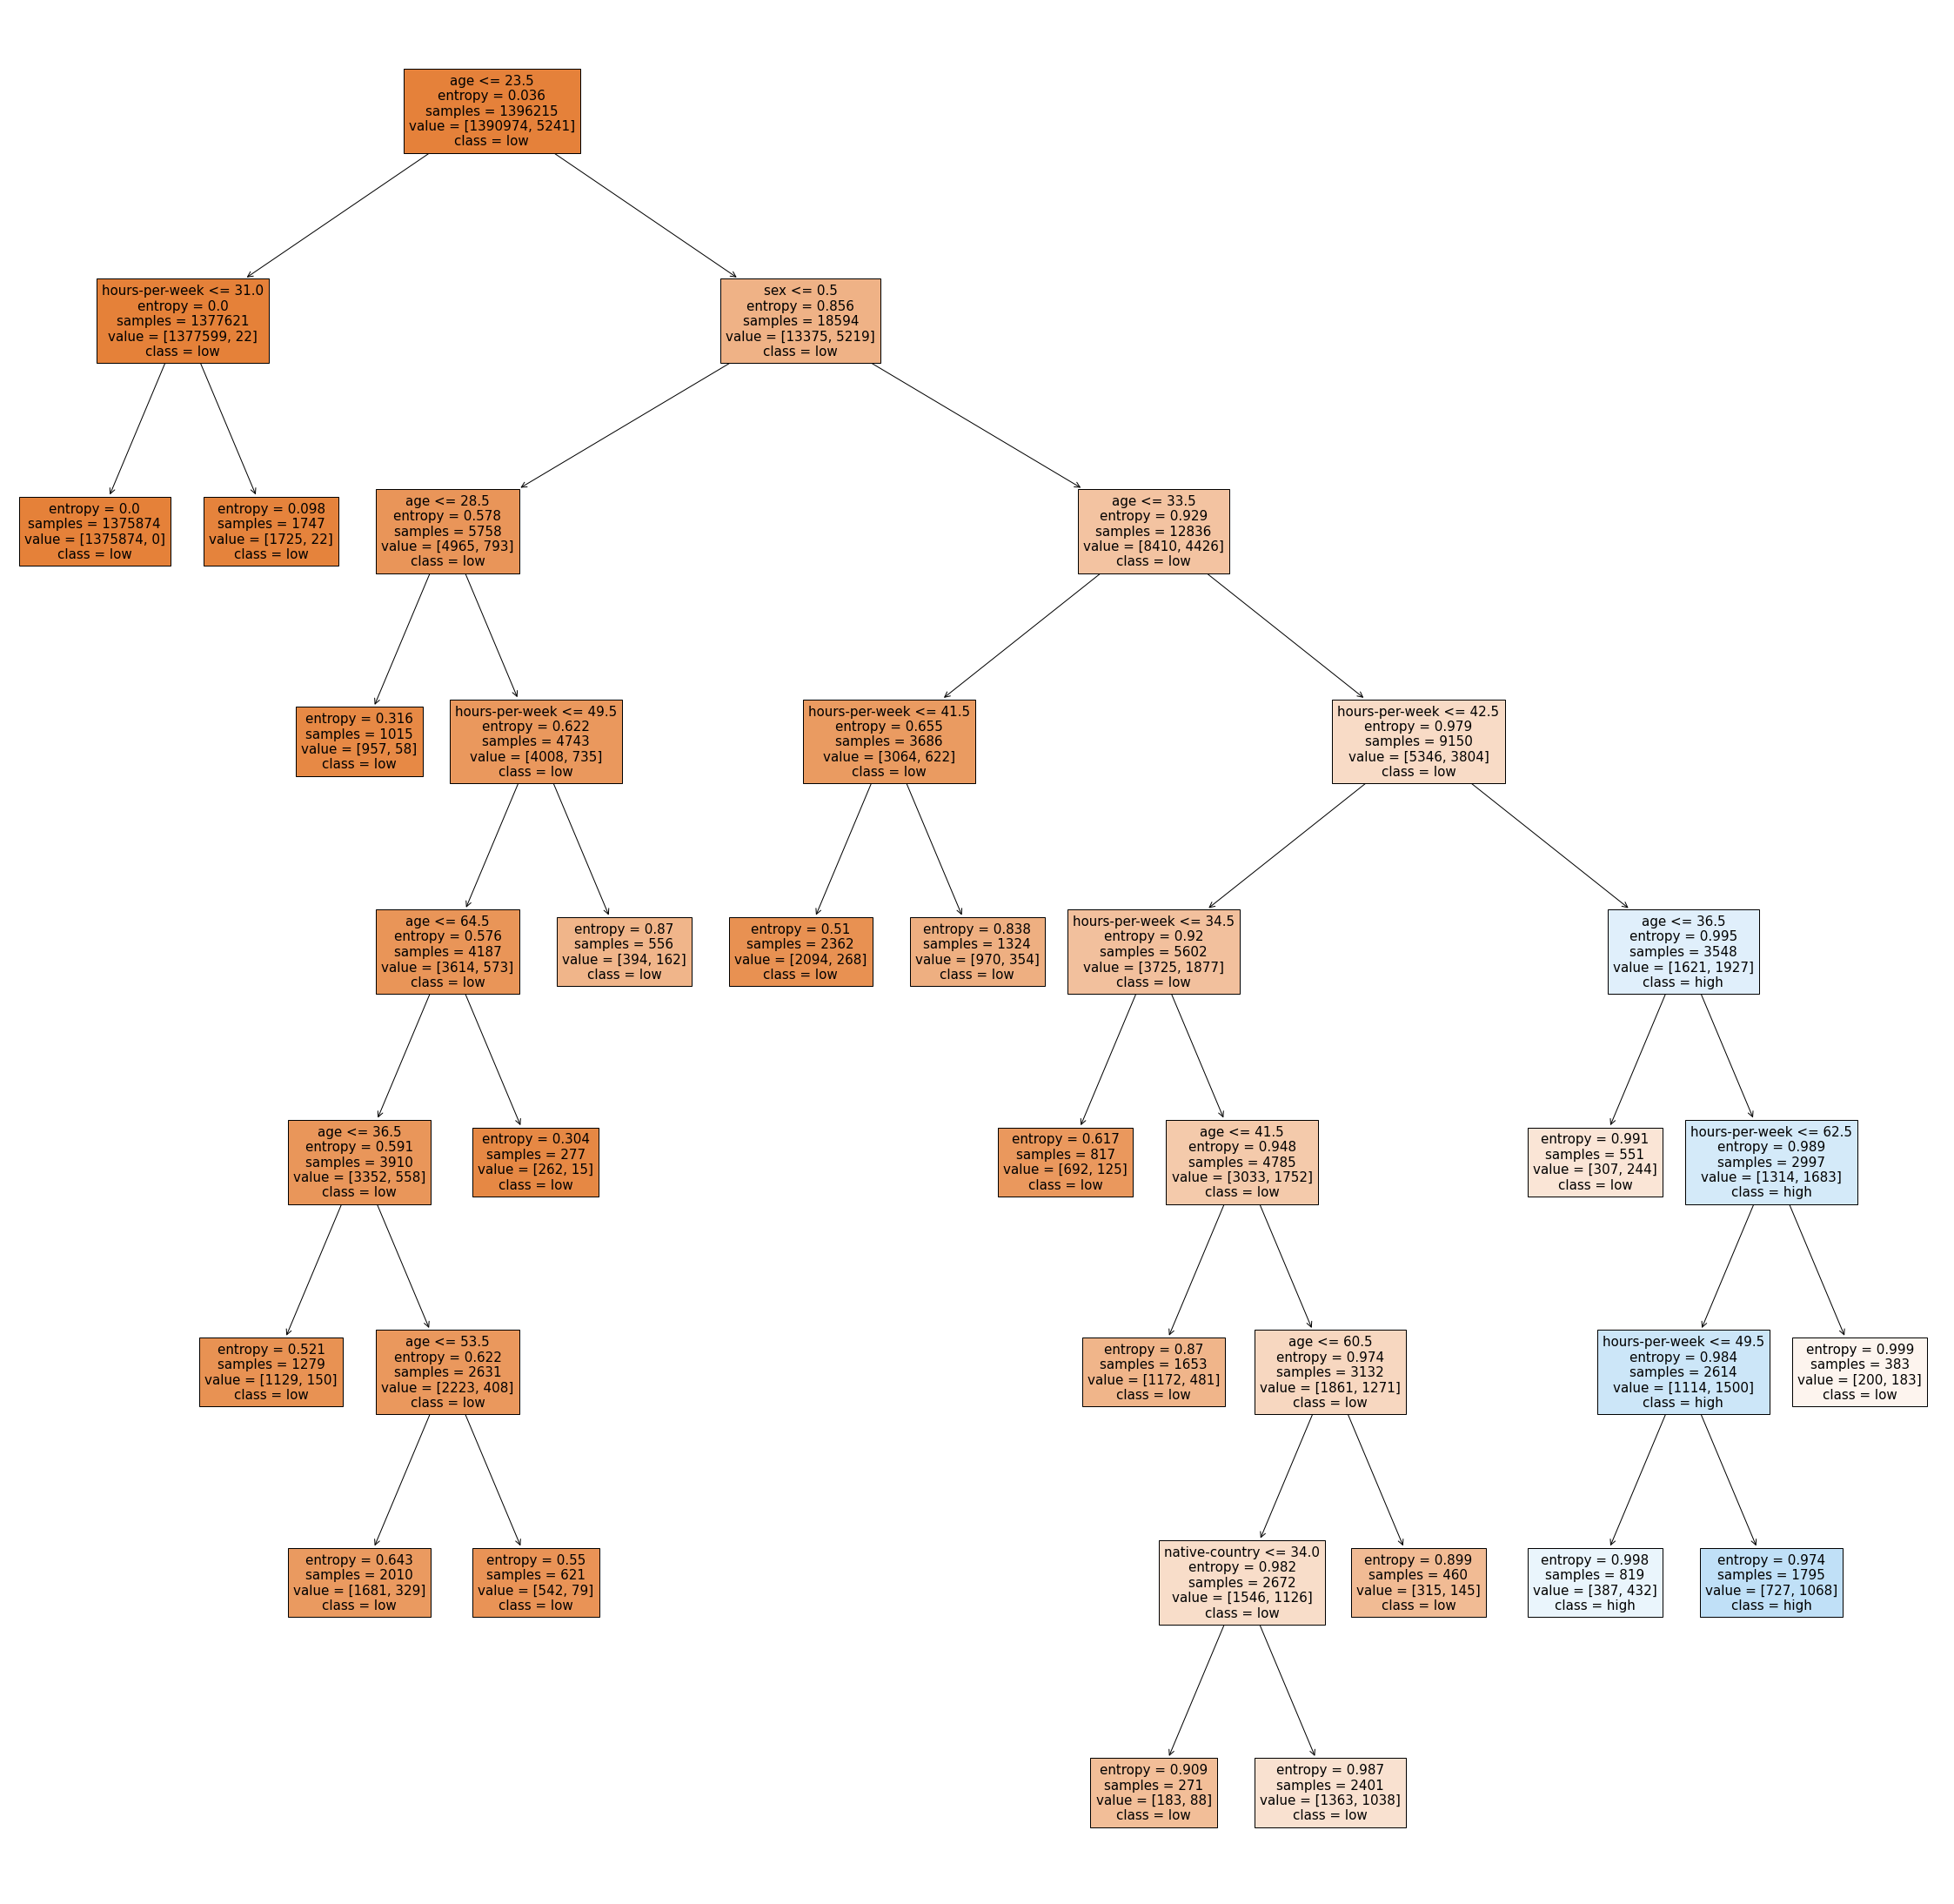

In [25]:
clf = DecisionTreeClassifier(criterion="entropy", min_samples_split=2500)
clf.fit(X_train, y_train)

fig = plt.figure(figsize=(40, 40))
p = tree.plot_tree(clf,filled=True, feature_names=X_train.columns.to_list(),
                  class_names=["low", "high"])
fig.savefig("tree.png")